In [1]:
import numpy as np

In [2]:
import time

In [3]:
import sys

In [99]:
import matplotlib.pyplot as plt

## NUMPY ARRAY VS PYTHON LIST

#### SPEED & CONVIENCE

In [4]:
a=[i for i in range(100000)]
b=[i for i in range(100000,200000)]

In [5]:
# PYTHON LIST

c=[]

start=time.time()

for i in range(len(a)):
    c.append(a[i]+b[i])
    
print(time.time()-start)

0.02299952507019043


In [6]:
# NUMPY ARRAY

a=np.arange(100000)
b=np.arange(100000,200000)

start=time.time()
c=a+b
print(time.time()-start)

0.0019996166229248047


In [7]:
0.048/0.002 # How faster Numpy Array than Python List

24.0

In [8]:
# Numpy Array use C type Array. Because It is Static Array, that means the size of memory does not increase/decrease.

# It is not a Referential Array,because you store the item directly in the memory not the address.

In [9]:
# Python List is Dynamic array. Everytime the size become double.

# It is a Referential Array, which means you store the address in the memory.

#### MEMORY

In [10]:
# PYTHON LIST

a1=[i for i in range(10000000)]

In [11]:
sys.getsizeof(a1) # It give the size occupy in the memory

89095160

In [12]:
# NUMPY ARRAY

a2=np.arange(10000000)

In [13]:
sys.getsizeof(a2) 

40000112

In [14]:
89095160/40000112  

2.2273727633562626

## ADVANCE INDEXING

In [15]:
c=np.arange(24).reshape(6,4)

In [16]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

#### FANCY INDEXING

In [17]:
c[[0,2,3,5]] # 1st,3rd,4th,6th Row 

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [18]:
c[[0,1,3]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [19]:
c[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

#### BOOLEAN INDEXING

In [20]:
c1=np.random.randint(1,100,24).reshape(6,4)

In [21]:
c1

array([[91, 20,  4, 31],
       [24, 59, 51, 72],
       [94,  8, 18, 83],
       [ 4, 68, 28, 60],
       [16, 60, 11, 11],
       [11,  9, 85, 30]])

In [22]:
# FIND ALL NUMBERS GREATER THAN 50

c1>50    # It give the TRUE/FALSE Value

array([[ True, False, False, False],
       [False,  True,  True,  True],
       [ True, False, False,  True],
       [False,  True, False,  True],
       [False,  True, False, False],
       [False, False,  True, False]])

In [23]:
# If you want the Integer Value then you pass the Condition inside variable in list.

c1[c1>50]   # It give the TRUE Integer Value

array([91, 59, 51, 72, 94, 83, 68, 60, 60, 85])

In [24]:
# FIND ALL THE EVEN NUMBERS

(c1%2==0)

array([[False,  True,  True, False],
       [ True, False, False,  True],
       [ True,  True,  True, False],
       [ True,  True,  True,  True],
       [ True,  True, False, False],
       [False, False, False,  True]])

In [25]:
c1[(c1%2==0)]

array([20,  4, 24, 72, 94,  8, 18,  4, 68, 28, 60, 16, 60, 30])

In [26]:
# FIND ALL NUMBERS GREATER THAN 50 & ARE EVEN

(c1>50) & (c1%2==0)

array([[False, False, False, False],
       [False, False, False,  True],
       [ True, False, False, False],
       [False,  True, False,  True],
       [False,  True, False, False],
       [False, False, False, False]])

In [27]:
c1[(c1>50) & (c1%2==0)]

array([72, 94, 68, 60, 60])

In [28]:
# FIND ALL NUMBERS NOT DIVISIBLE BY 7

~(c1%7==1)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False,  True]])

In [29]:
c1[~(c1%7==0)]

array([20,  4, 31, 24, 59, 51, 72, 94,  8, 18, 83,  4, 68, 60, 16, 60, 11,
       11, 11,  9, 85, 30])

# BROADCASTING

#### The term Broadcasting describes How Numpy treats arrays with different shapes during arithmetic operations.

#### The smaller array is "Broadcast" across the larger array so that they have compatible shapes.

### SAME SHAPE

In [30]:
a=np.arange(6).reshape(2,3)
b=np.arange(6,12).reshape(2,3)

In [31]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [32]:
b

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [33]:
a+b

array([[ 6,  8, 10],
       [12, 14, 16]])

### DIFFERENT SHAPE

In [34]:
a=np.arange(6).reshape(2,3)
b=np.arange(3).reshape(1,3)

In [35]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [36]:
b

array([[0, 1, 2]])

In [37]:
a+b

array([[0, 2, 4],
       [3, 5, 7]])

## BROADCASTING RULES
    ---> When we will do vectorization in that time we use Broadcasting.

### 1. Make the two arrays have the same number of dimension.
        --> If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

### 2. Make each dimension of the two arrays the same size.
        ---> If the sizes of each dimension of the arrays do not match, dimensions with size 1 are stretched to the size of the other array.
        ---> If there is a dimension whose size is not 1 in eiither of the two arrays, it can not be Broadcasted, and an error is raised.

## NUMPY BROADCASTING EXAMPLE

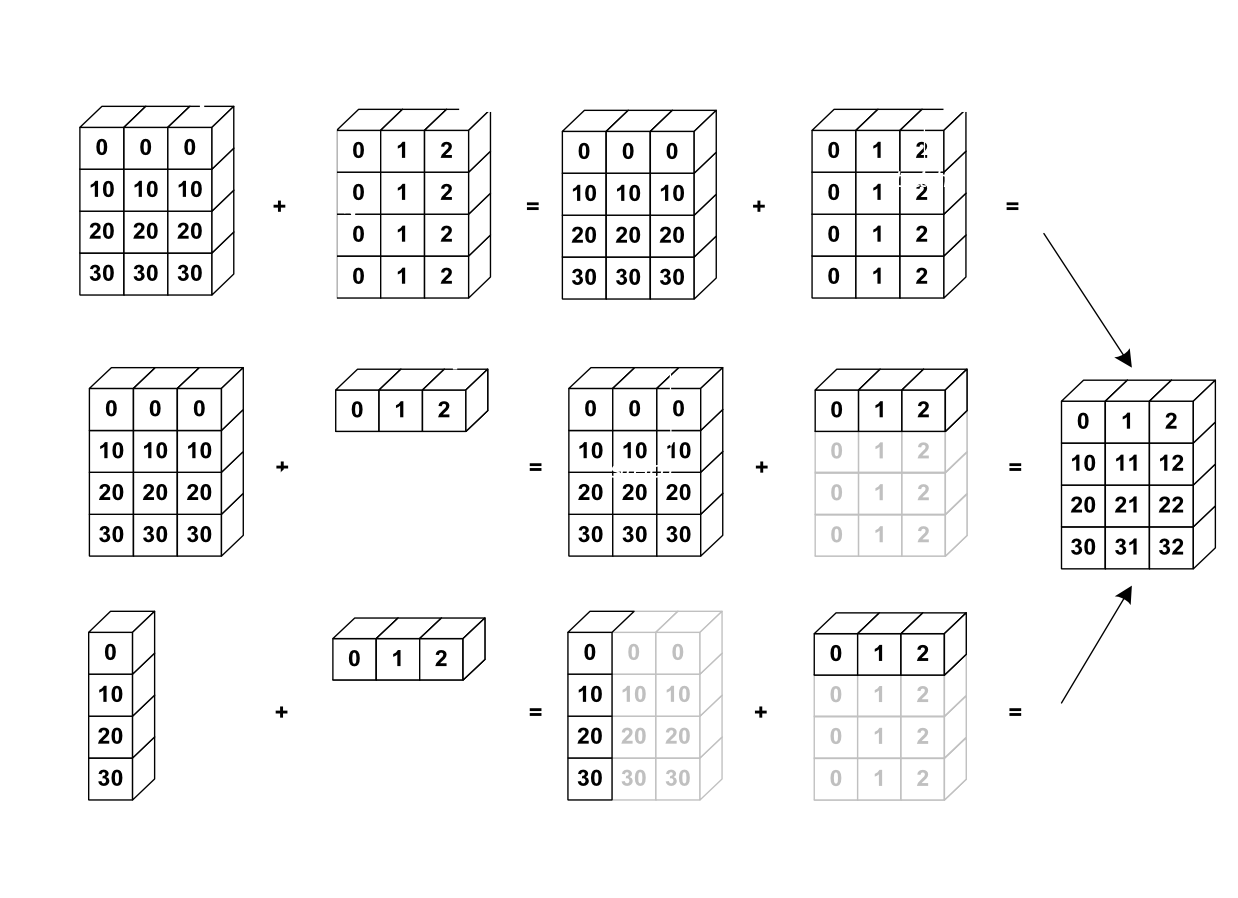

## NUMPY BROADCASTING EXAMPLE-2

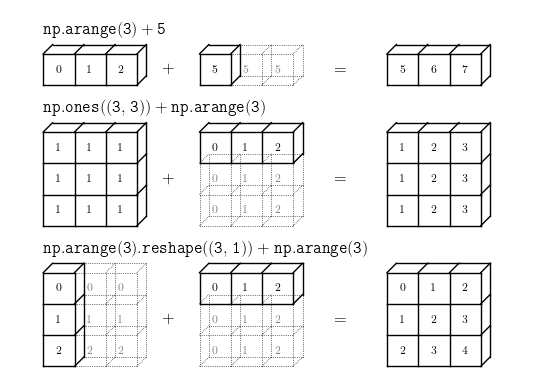

### MORE EXAMPLES

#### Eg.1

In [38]:
a=np.arange(12).reshape(4,3)
b=np.arange(3)

In [39]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [40]:
b

array([0, 1, 2])

In [41]:
a+b # Broadcasted because we add left side of the smaller shape to 1 & then enhance to 4,so the two array are same in shape.

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

#### Eg.2

In [42]:
a1=np.arange(12).reshape(3,4)
b1=np.arange(3)

In [43]:
a1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
b1

array([0, 1, 2])

In [45]:
# a1+b1     # It gives error. Because the shape is not same & also not broadcasted

#### Eg.3

In [46]:
a2=np.arange(3).reshape(3,1)
b2=np.arange(3).reshape(1,3)

In [47]:
a2

array([[0],
       [1],
       [2]])

In [48]:
b2

array([[0, 1, 2]])

In [49]:
a2+b2 # Broadcasted because both the shape has 1, and we enhanced them and convert to same shape.

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Eg.4

In [50]:
a3=np.arange(3).reshape(1,3)
b3=np.arange(4).reshape(4,1)

In [51]:
a3+b3

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

#### Eg.5

In [52]:
a4=np.array([1])
b4=np.arange(4).reshape(2,2)

In [53]:
a4

array([1])

In [54]:
b4

array([[0, 1],
       [2, 3]])

In [55]:
a4+b4

array([[1, 2],
       [3, 4]])

#### Eg.6

In [56]:
a5=np.arange(12).reshape(3,4)
b5=np.arange(12).reshape(4,3)

In [57]:
a5

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
b5

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [59]:
# a5+b5  # Not Broadcasted, because two arrays are different shape

#### Eg.7

In [60]:
a6=np.arange(16).reshape(4,4)
b6=np.arange(4).reshape(2,2)

In [61]:
a6

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [62]:
b6

array([[0, 1],
       [2, 3]])

In [63]:
# a6+b6  # Not Broadcasted, because two arrays are different shape

### 

## WORKING WITH MATHEMATICAL FORMULAS

#### SIGMOID

##### SIGMOID FUNCTION FORMULA

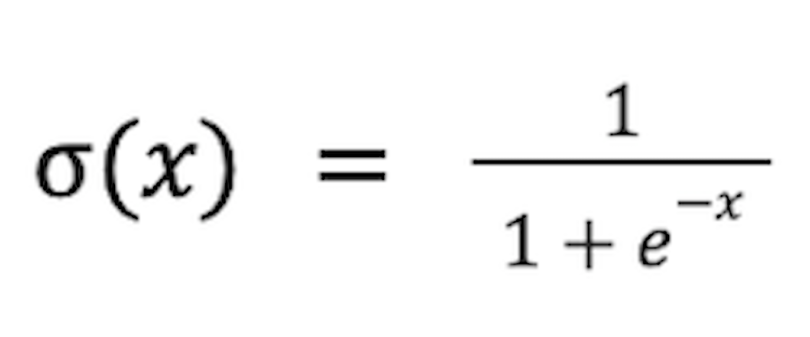

In [64]:
def sigmoid(array):
    return 1/(1+np.exp(-(array)))

In [65]:
a=np.arange(100)

In [66]:
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

#### 

#### MEAN SQUARED ERROR

##### MEAN SQUARED ERROR FORMULA

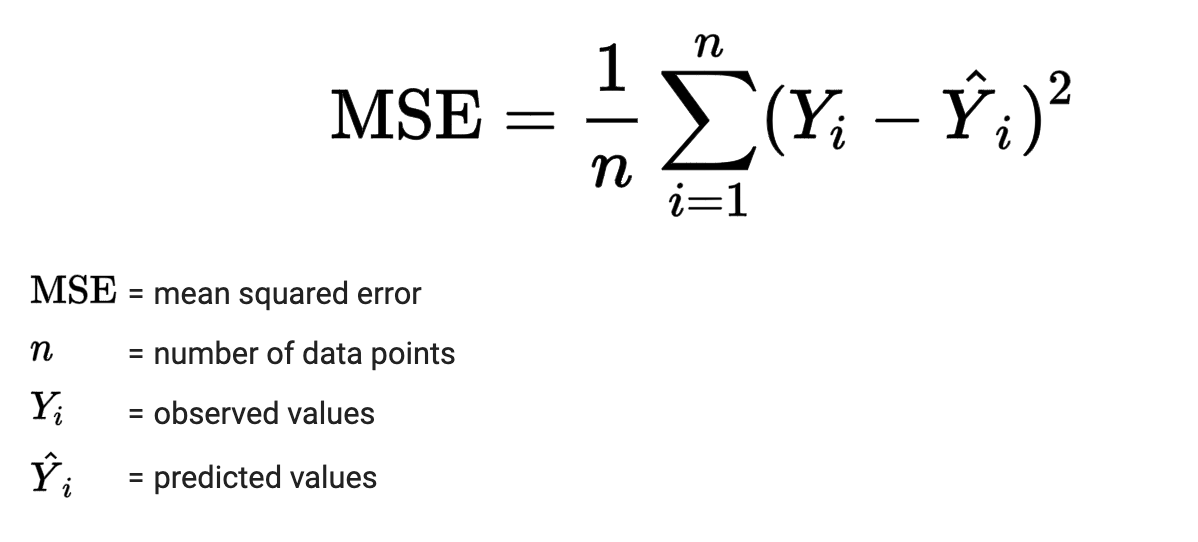

In [67]:
actual=np.random.randint(1,50,25)
predict=np.random.randint(1,50,25)

In [68]:
actual

array([20,  5, 49, 22, 16,  2, 35, 42, 47,  1, 26, 19, 27, 38,  7, 21, 22,
       26, 43,  1, 11, 38, 40,  7, 19])

In [69]:
predict

array([ 5, 24, 23, 47, 12, 29, 26, 14, 38, 11, 31, 39,  8,  7, 41, 31, 12,
       49, 19, 23,  6, 10, 40, 43, 28])

In [70]:
def mse(act,prd):
    return np.mean(np.square(act-prd))

In [71]:
mse(actual,predict)

422.24

#### BINARY CROSS ENTROPY

##### BINARY CROSS ENTROPY FORMULA

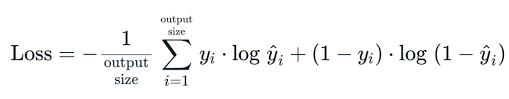

In [82]:
actual1=np.random.randint(1,50,25)
predict1=np.random.randint(1,50,25)

In [83]:
actual1

array([16, 44, 44, 44,  3, 12, 32,  4, 29, 45, 22,  3, 14, 41, 18, 35, 45,
        1, 48, 34, 20, 24,  5,  2, 27])

In [84]:
predict1

array([32, 30, 17, 27, 15, 48, 14, 32, 43,  3, 29,  5,  2, 34, 46, 12,  6,
       48, 18, 20, 13, 15, 39,  6, 45])

In [85]:
def bce(act,pred):
    return -(np.mean ((actual1 * np.log(predict1) ) - ( (-1+actual1) * (np.log( (-1+predict1) ) )) ) )

In [86]:
bce(actual1,predict1)

-5.226342221730536

#### 

## WORKING WITH MISSING VALUES

In [87]:
a=np.array([1,2,3,4,np.nan,6])

In [88]:
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [92]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [93]:
a[np.isnan(a)] # It only give Missing value that is "nan"

array([nan])

In [94]:
a[~np.isnan(a)] # It give the value that is not "nan",it only give the values.

array([1., 2., 3., 4., 6.])

### 

## PLOTTING GRAPHS

### x=y Graph
     Straight Line Through Origin Graph

In [95]:
x=np.linspace(-10,10,100)

In [96]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [97]:
y=x

In [98]:
y

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

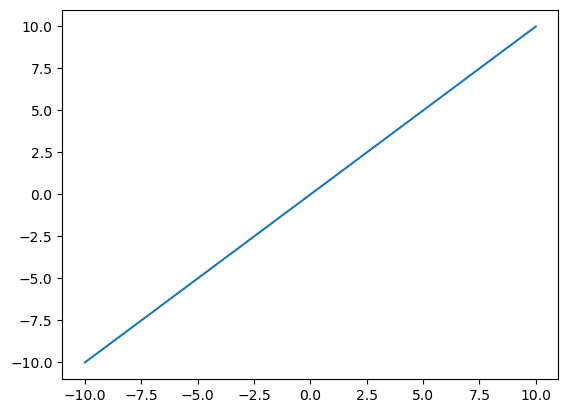

In [100]:
plt.plot(x,y)

### y=x^2 Graph
     Parabola 

In [101]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [104]:
y=x**2

In [105]:
y

array([1.00000000e+02, 9.60004081e+01, 9.20824406e+01, 8.82460973e+01,
       8.44913784e+01, 8.08182838e+01, 7.72268136e+01, 7.37169677e+01,
       7.02887460e+01, 6.69421488e+01, 6.36771758e+01, 6.04938272e+01,
       5.73921028e+01, 5.43720029e+01, 5.14335272e+01, 4.85766758e+01,
       4.58014488e+01, 4.31078461e+01, 4.04958678e+01, 3.79655137e+01,
       3.55167840e+01, 3.31496786e+01, 3.08641975e+01, 2.86603408e+01,
       2.65381084e+01, 2.44975003e+01, 2.25385165e+01, 2.06611570e+01,
       1.88654219e+01, 1.71513111e+01, 1.55188246e+01, 1.39679625e+01,
       1.24987246e+01, 1.11111111e+01, 9.80512193e+00, 8.58075707e+00,
       7.43801653e+00, 6.37690032e+00, 5.39740843e+00, 4.49954086e+00,
       3.68329762e+00, 2.94867871e+00, 2.29568411e+00, 1.72431385e+00,
       1.23456790e+00, 8.26446281e-01, 4.99948985e-01, 2.55076013e-01,
       9.18273646e-02, 1.02030405e-02, 1.02030405e-02, 9.18273646e-02,
       2.55076013e-01, 4.99948985e-01, 8.26446281e-01, 1.23456790e+00,
      

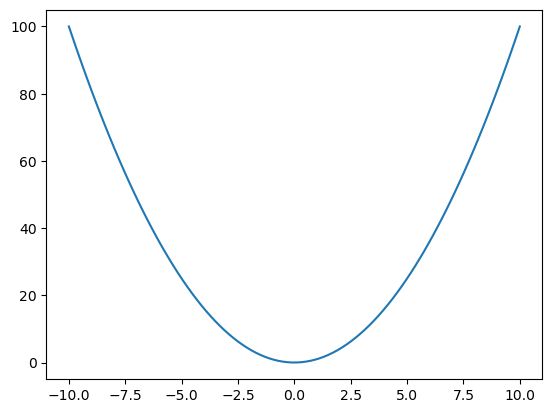

In [106]:
plt.plot(x,y)

### y=sin(x)

In [107]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [108]:
y=np.sin(x)

In [109]:
y

array([ 0.54402111,  0.36459873,  0.17034683, -0.03083368, -0.23076008,
       -0.42130064, -0.59470541, -0.74392141, -0.86287948, -0.94674118,
       -0.99209556, -0.99709789, -0.96154471, -0.8868821 , -0.77614685,
       -0.63384295, -0.46575841, -0.27872982, -0.0803643 ,  0.12126992,
        0.31797166,  0.50174037,  0.66510151,  0.80141062,  0.90512352,
        0.97202182,  0.99938456,  0.98609877,  0.93270486,  0.84137452,
        0.7158225 ,  0.56115544,  0.38366419,  0.19056796, -0.01027934,
       -0.21070855, -0.40256749, -0.57805259, -0.73002623, -0.85230712,
       -0.93992165, -0.98930624, -0.99845223, -0.96698762, -0.8961922 ,
       -0.78894546, -0.64960951, -0.48385164, -0.2984138 , -0.10083842,
        0.10083842,  0.2984138 ,  0.48385164,  0.64960951,  0.78894546,
        0.8961922 ,  0.96698762,  0.99845223,  0.98930624,  0.93992165,
        0.85230712,  0.73002623,  0.57805259,  0.40256749,  0.21070855,
        0.01027934, -0.19056796, -0.38366419, -0.56115544, -0.71

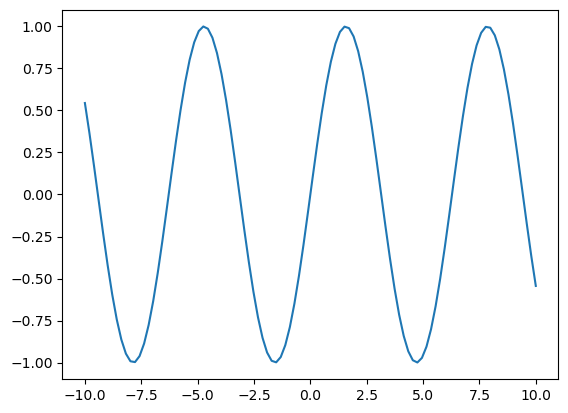

In [110]:
plt.plot(x,y)

### y=xlog(x)

In [111]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [114]:
y=(x) * (np.log(x))

C:\Users\mitra\AppData\Local\Temp\ipykernel_20016\593310222.py:1: RuntimeWarning: invalid value encountered in log
  y=(x) * (np.log(x))


In [115]:
y

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -0.23156917, -0.36179469, -0.34499841, -0.24508811, -0.08664562,
        0.11706724,  0.35771614,  0.62956885,  0.92843798,  1.25112931,
        1.59512538,  1.95839066,  2.33924512,  2.73627848,  3.14829001,
        3.57424504,  4.01324268,  4.46449148,  4.92729058,  5.40

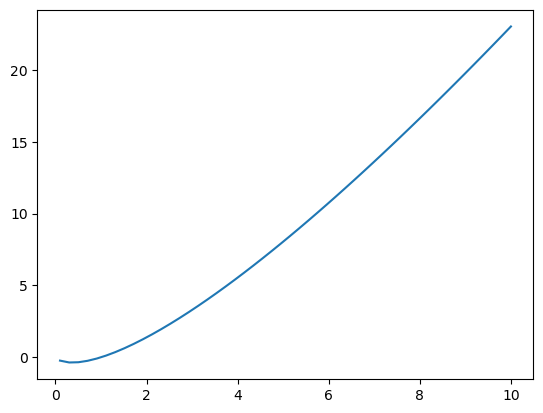

In [116]:
plt.plot(x,y)